EN3150 Assignment 02:                    Learning from data and related challenges and classification                            200702H


QUESTION 01

 Logistic regression weight update process

W values | 10 iterations later | Gradient Descent:
W0: 0.009031764884538475
W1: 0.262301155857097
W2: 0.4994938404035172



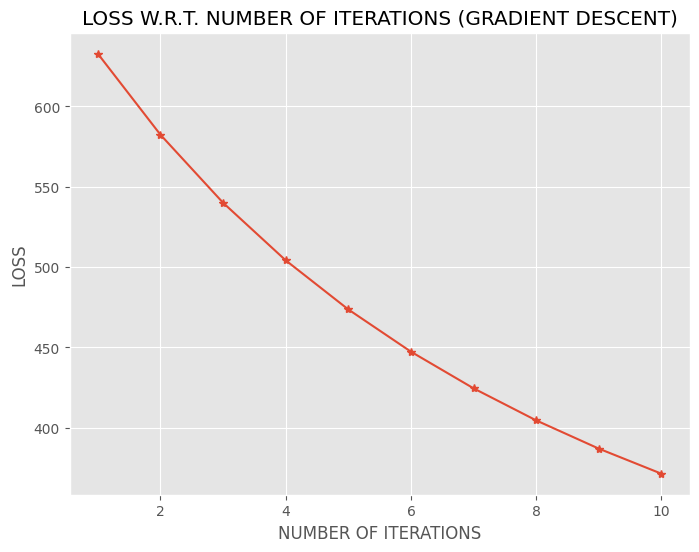

W Values | 10 iterations later | Newton's Method :
W0: 3.145757812061996
W1: 2.9679207749775514
W2: 1.4806766332837635



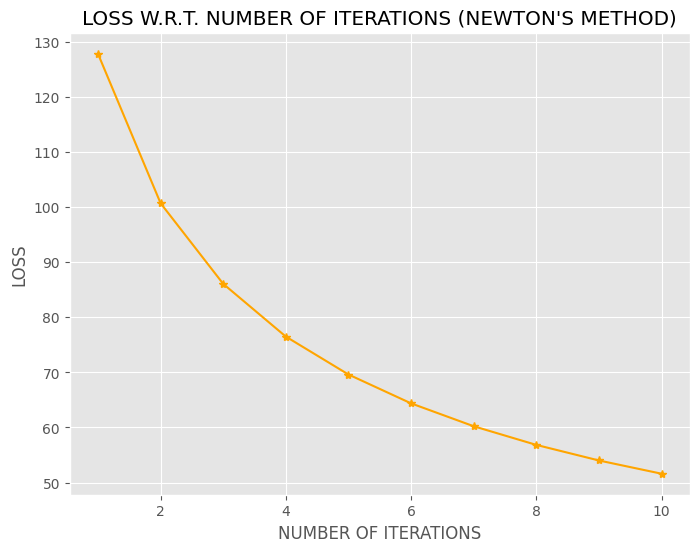

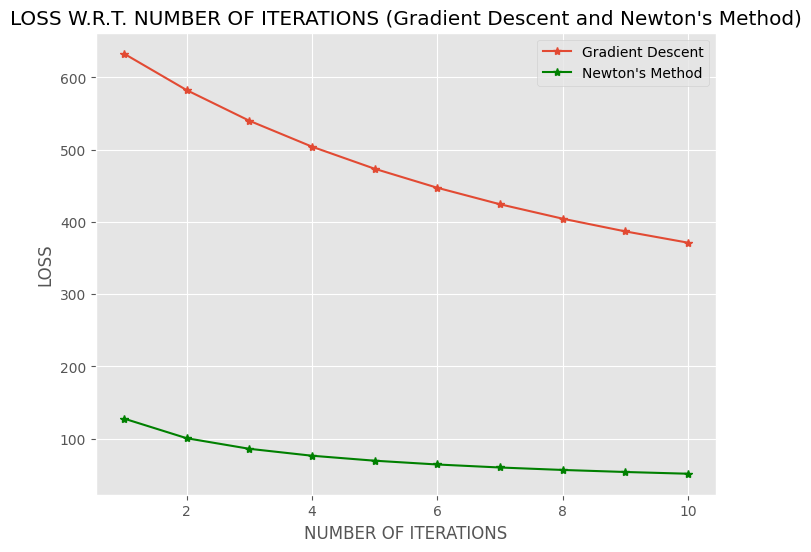

Iteration | Gradient Descent Loss | Newton's Method Loss
--------------------------------------------------------
   1     |      632.8212         |       127.8597
   2     |      582.3973         |       100.7177
   3     |      540.0400         |       86.0785
   4     |      504.2051         |       76.5029
   5     |      473.6390         |       69.6205
   6     |      447.3433         |       64.3793
   7     |      424.5299         |       60.2261
   8     |      404.5770         |       56.8375
   9     |      386.9932         |       54.0096
   10     |      371.3875         |       51.6069
--------------------------------------------------------


C:\Users\Udith\AppData\Local\Temp\ipykernel_7996\3426866940.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gradient_descent_loss = float(loss_history[i])
C:\Users\Udith\AppData\Local\Temp\ipykernel_7996\3426866940.py:185: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  newton_method_loss = float(newton_loss_history[i])


In [36]:
################################# PART 1 ###################################################################################################

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# generate synthetic data
np.random.seed(0)

# Define cluster centers for synthetic data generation
cluster_centers = [[-5, 0], [0, 1.5]]


data_X, data_y = make_blobs(n_samples=1000, centers=cluster_centers, random_state=40)
transformation_matrix = [[0.4, 0.2], [-0.4, 1.2]]
data_X = np.dot(data_X, transformation_matrix)

# Add a bias term to the feature matrix
data_X = np.c_[np.ones((data_X.shape[0], 1)), data_X]

coefficients_W = np.zeros(data_X.shape[1])

# Define the logistic sigmoid function
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

# Define the logistic loss (binary cross-entropy) function
def log_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Set parameters for gradient descent
learning_rate = 0.1
iterations = 10
loss_history = []

################################ PART 02  ######################################################################################################

# Get the number of data samples
num_samples = data_X.shape[0]
matrix_1s = np.ones((num_samples, 1))
matrix_1s = matrix_1s.T

# Reshape the coefficient vector W 
coefficients_W = coefficients_W.reshape(3, 1)

def update_coefficients():
    global coefficients_W
    global E
    for i in range(num_samples):
        LinearComb = np.dot(coefficients_W.T, data_X[i].reshape(3, 1))
        erf = sigmoid_function(LinearComb) - data_y[i]
        E = np.append(E, erf)
    D = np.diag(E)
    A = matrix_1s @ D
    B = A @ data_X
    BT = B.T
    coefficients_W -= learning_rate * (1 / num_samples) * BT

def totalLoss():
    Loss = 0
    for i in range(num_samples):
        LinearComb = np.dot(coefficients_W.T, data_X[i].reshape(3, 1))
        y_pred = sigmoid_function(LinearComb)
        loss = log_loss(data_y[i], y_pred)
        Loss += loss
    return Loss

for t in range(iterations):
    E = np.array([])
    update_coefficients()
    loss_history.append(totalLoss())

print("W values | 10 iterations later | Gradient Descent:")
for i, coeff in enumerate(coefficients_W):
    print(f'W{i}:', coeff[0])

print()

loss_history = np.reshape(loss_history, (iterations, 1))
iteration_numbers = np.arange(1, iterations + 1)

#################################### PART 3 ################################################################################################ 
# Plot the loss with respect to the number of iterations (Gradient Descent)
plt.figure(figsize=(8, 6))
plt.plot(iteration_numbers, loss_history, marker='*', linestyle='-')
plt.title('LOSS W.R.T. NUMBER OF ITERATIONS (GRADIENT DESCENT)')
plt.xlabel('NUMBER OF ITERATIONS')
plt.ylabel('LOSS')
plt.grid(True)
plt.show()

##################################### PART 4 ##############################################################################################
# Set parameters for Newton's method
learning_rate = 0.1
iterations = 10
newton_loss_history = []

# Initialize coefficients for Newton's method
newton_coefficients_W = np.zeros(data_X.shape[1])
newton_coefficients_W = newton_coefficients_W.reshape(3, 1)
matrix_1s_N = np.ones((num_samples, 1))
matrix_1s_N_T = matrix_1s_N.T

def Calculate_A(X, W, y):
    Svector = np.array([])
    for i in range(num_samples):
        temP3 = np.dot(W.T, X[i].reshape(3, 1))
        Si = (sigmoid_function(temP3) - y[i]) * (1 - sigmoid_function(temP3) - y[i])
        Svector = np.append(Svector, Si)
    S = np.diag(Svector)
    A = np.dot(X.T, S)
    A = np.dot(A, X)
    A = A / num_samples
    return A

def Calculate_B(X, W_newton, y):
    V = np.array([])
    for i in range(num_samples):
        temp = np.dot(W_newton.T, X[i].reshape(3, 1))
        Err = sigmoid_function(temp) - y[i]
        V = np.append(V, Err)
    D = np.diag(V)
    B = np.dot(matrix_1s_N_T, D)
    B = np.dot(B, X)
    B = B.T
    B = B / num_samples
    return B

for t in range(iterations):
    A = Calculate_A(data_X, coefficients_W, data_y)
    A_inverse = np.linalg.inv(A)
    B = Calculate_B(data_X, newton_coefficients_W, data_y)

    # Update coefficients (Newton's Method)
    newton_coefficients_W = newton_coefficients_W - np.dot(A_inverse, B)

    # Overall Loss calculation
    Loss = 0
    for i in range(num_samples):
        temp2 = np.dot(newton_coefficients_W.T, data_X[i].reshape(3, 1))
        y_pred = sigmoid_function(temp2)
        loss = log_loss(data_y[i], y_pred)
        Loss += loss

    newton_loss_history.append(Loss)

print("W Values | 10 iterations later | Newton's Method :")
for i, coeff in enumerate(newton_coefficients_W):
    print(f'W{i}:', coeff[0])

print()

################################### PART 5 ################################################################################################## 
#Plot the loss with respect to the number of iterations (Newton's Method)
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
iteration_numbers = np.arange(1, iterations + 1)
plt.plot(iteration_numbers, np.reshape(newton_loss_history, (iterations, 1)), marker='*', linestyle='-', color='orange')
plt.title("LOSS W.R.T. NUMBER OF ITERATIONS (NEWTON'S METHOD)")
plt.xlabel("NUMBER OF ITERATIONS")
plt.ylabel("LOSS")
plt.grid(True)
plt.show()

#################################### PART 6 #################################################################################################  
#Plot the loss with respect to the number of iterations for both Gradient Descent and Newton's Method
plt.figure(figsize=(8, 6))
plt.plot(iteration_numbers, loss_history, marker='*', linestyle='-', label="Gradient Descent")
plt.plot(iteration_numbers, np.reshape(newton_loss_history, (iterations, 1)), marker='*', linestyle='-', color='green', label="Newton's Method")
plt.title('LOSS W.R.T. NUMBER OF ITERATIONS (Gradient Descent and Newton\'s Method)')
plt.xlabel('NUMBER OF ITERATIONS')
plt.ylabel('LOSS')
plt.grid(True)
plt.legend()
plt.show()

# Print the tabulated loss values
print("Iteration | Gradient Descent Loss | Newton's Method Loss")
print("--------------------------------------------------------")
for i in range(iterations):
    gradient_descent_loss = float(loss_history[i])
    newton_method_loss = float(newton_loss_history[i])
    print(f"   {i + 1}     |      {gradient_descent_loss:.4f}         |       {newton_method_loss:.4f}")
print("--------------------------------------------------------")


QUESTION 02

 Perform grid search for hyper-parameter tuning

c:\Python311\cv\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
c:\Python311\cv\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


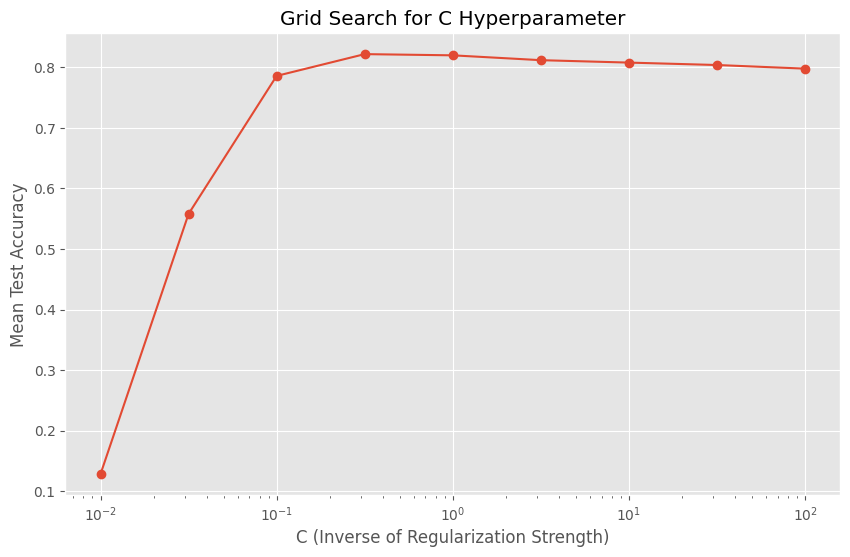

Accuracy: 0.8
Confusion Matrix:
[[ 3  0  0  0  0  0  1  0  0  0]
 [ 0 15  0  0  0  0  1  0  0  0]
 [ 0  0  9  0  0  0  2  0  2  0]
 [ 0  1  0 10  0  0  1  2  0  0]
 [ 0  0  0  0  8  0  0  1  0  1]
 [ 0  0  0  0  0  8  0  0  0  0]
 [ 0  1  0  0  0  0  6  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  1]
 [ 0  2  0  0  0  0  0  0  6  0]
 [ 1  0  0  0  1  0  0  2  0  6]]
Precision: 0.8326722108301056
Recall: 0.8
F1 Score: 0.802717019822283


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.utils import check_random_state

# Data loading
train_samples = 500
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=100)

# 3. Create a pipeline with Lasso logistic regression and scaling
lasso_logistic_regression = LogisticRegression(penalty='l1', solver='liblinear', multi_class='auto')
scaler = StandardScaler()

pipeline = Pipeline([
    ('scaler', scaler),
    ('lasso_logistic', lasso_logistic_regression)
])

# 4. Use GridSearchCV to perform a grid search over the range of hyperparameter C
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'lasso_logistic__C': np.logspace(-2, 2, 9)}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 5. Plot the classification accuracy with respect to hyperparameter C
results = grid_search.cv_results_
C_values = np.logspace(-2, 2, 9)

plt.figure(figsize=(10, 6))
plt.semilogx(C_values, results['mean_test_score'], marker='o')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Mean Test Accuracy')
plt.title('Grid Search for C Hyperparameter')
plt.grid(True)
plt.show()

# 6. Calculate confusion matrix, precision, recall, and F1-score
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)




In [47]:
import pandas as pd

# Extract relevant data from the grid search results
results_df = pd.DataFrame({
    'C': results['param_lasso_logistic__C'],
    'Mean Test Accuracy': results['mean_test_score']
})

# Print the table
print(results_df)

           C  Mean Test Accuracy
0       0.01               0.128
1   0.031623               0.558
2        0.1               0.786
3   0.316228               0.822
4        1.0               0.820
5   3.162278               0.812
6       10.0               0.808
7  31.622777               0.804
8      100.0               0.798


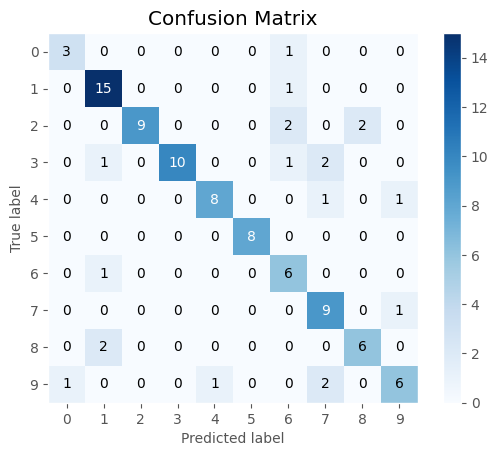

In [48]:
# Plot the confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)
plt.title('Confusion Matrix')
plt.show()

QUESTION 03

 Logistic regression

In [26]:
import numpy as np

# Given coefficients
w0 = -6
w1 = 0.05
w2 = 1

# (a) Calculate the estimated probability for a student who has studied for 40 hours and has an undergraduate GPA of 3.5
x1 = 40
x2 = 3.5

# Logistic regression formula
estimated_probability = 1 / (1 + np.exp(-(w0 + w1 * x1 + w2 * x2)))

print(f"The estimated probability is approximately {estimated_probability:.4f}")

# (b) Calculate the number of hours needed for a 50% chance of receiving an A+
target_probability = 0.5

# Solve for x1 (hours studied)
required_hours = (np.log(target_probability / (1 - target_probability)) - w0 - w2 * x2) / w1

print(f"To achieve a 50% chance of receiving an A+, a student needs to complete approximately {required_hours:.2f} hours of study.")


The estimated probability is approximately 0.3775
To achieve a 50% chance of receiving an A+, a student needs to complete approximately 50.00 hours of study.
